In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

## Load dataframe

Para esta analise iremos utilizar dados de uma industria textil e dados exogenos fornecidos pelo IBGE e Bacen

In [2]:
df_textil = pd.read_csv('textil.csv')

## Inicio da analise

In [3]:
df_textil.profile_report()

/home/pc/projects/lib/python3.6/site-packages/pandas_profiling/model/base.py:173: UserWarning: Column "date" appears to be containing only date/datetime values. You might consider changing the type to datetime (pd.to_datetime())
  "changing the type to datetime (pd.to_datetime())".format(series.name)


In [4]:
df_textil.head()

ano  mes  qtd_vendida tipo_roupa        date
0  2012    1          262       body  2012-01-01
1  2012    2         2882       body  2012-02-01
2  2012    3         2860       body  2012-03-01
3  2012    4         2096       body  2012-04-01
4  2012    5         1572       body  2012-05-01

Distribuicao da quantidade vendida

In [5]:
df_textil.groupby(['tipo_roupa'])['qtd_vendida'].agg(['mean', 'std', 'median', 'sum'])

mean          std  median    sum
tipo_roupa                                           
body          2642.333333  1291.589909  2871.0  63416
calca_baby     923.333333   445.276530  1009.0  22160
cam_baby       788.583333   382.788841   849.5  18926
cam_toddler    526.416667   254.991034   576.0  12634
conj_baby     1318.208333   639.073309  1441.0  31637
conj_toddler  1445.375000   699.871716  1560.0  34689
mac_toddler    925.708333   457.868643  1009.0  22217
macacao       1967.583333   952.007303  2161.0  47222

Sazonalidade

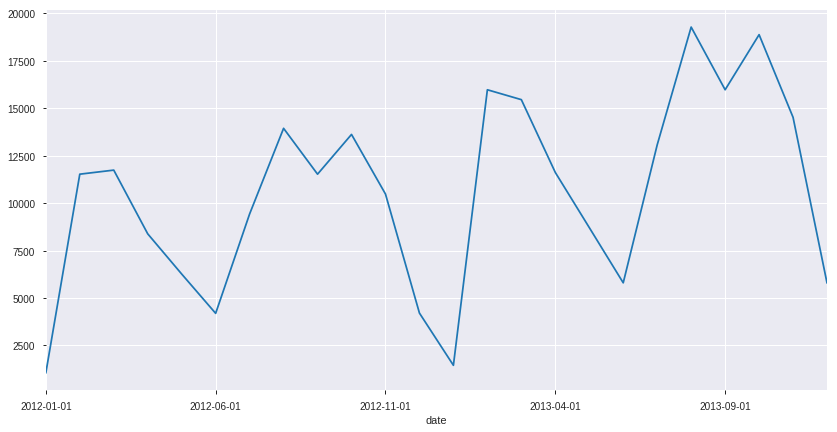

In [6]:
df_textil.groupby(['date'])['qtd_vendida'].sum().plot.line(figsize=(14,7))

## Histograma

Distribuicao quantidade vendida

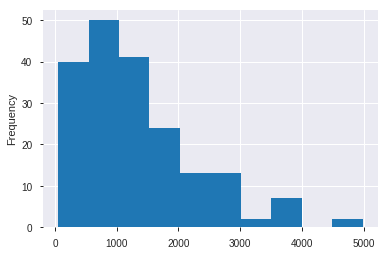

In [7]:
df_textil.qtd_vendida.plot(kind='hist')

## Tukey

Existe diferenca estatisticamente significativa entre a quantidade vendida por tipo de roupa

In [8]:
mc = MultiComparison(df_textil['qtd_vendida'], df_textil['tipo_roupa'])
result = mc.tukeyhsd()

In [9]:
print(result)

        Multiple Comparison of Means - Tukey HSD,FWER=0.05       
   group1       group2     meandiff    lower      upper    reject
-----------------------------------------------------------------
    body      calca_baby   -1719.0   -2352.0345 -1085.9655  True 
    body       cam_baby    -1853.75  -2486.7845 -1220.7155  True 
    body     cam_toddler  -2115.9167 -2748.9512 -1482.8821  True 
    body      conj_baby   -1324.125  -1957.1595 -691.0905   True 
    body     conj_toddler -1196.9583 -1829.9929 -563.9238   True 
    body     mac_toddler  -1716.625  -2349.6595 -1083.5905  True 
    body       macacao     -674.75   -1307.7845  -41.7155   True 
 calca_baby    cam_baby    -134.75   -767.7845   498.2845  False 
 calca_baby  cam_toddler  -396.9167  -1029.9512  236.1179  False 
 calca_baby   conj_baby    394.875   -238.1595  1027.9095  False 
 calca_baby  conj_toddler  522.0417  -110.9929  1155.0762  False 
 calca_baby  mac_toddler    2.375    -630.6595   635.4095  False 
 calca_bab

## Variaveis exogenas

In [10]:
exogenas = pd.read_csv('exogenas.csv')

In [11]:
exogenas.head()

ano  mes  desemprego  selic  ipca   pib  risco_e  dolar  risco
0  2010    1         7.2   0.66  0.75  9.21    175.0   1.77    208
1  2010    2         7.4   0.59  0.78  9.21    175.0   1.84    223
2  2010    3         7.6   0.76  0.52  9.21    175.0   1.78    190
3  2010    4         7.3   0.67  0.57  8.52    175.0   1.75    179
4  2010    5         7.5   0.75  0.43  8.52    175.0   1.81    224

In [12]:
evolucao = df_textil.groupby(['ano','mes'], as_index=False)['qtd_vendida'].sum()

In [13]:
df_full = evolucao.merge(exogenas, how='left', on=['ano', 'mes'])

In [14]:
df_full.head()

ano  mes  qtd_vendida  desemprego  selic  ipca   pib  risco_e  dolar  \
0  2012    1         1048         5.5   0.89  0.56  1.71    146.0   1.79   
1  2012    2        11527         5.7   0.75  0.45  1.71    146.0   1.71   
2  2012    3        11741         6.2   0.82  0.21  1.71    146.0   1.79   
3  2012    4         8383         6.0   0.71  0.64  0.99    146.0   1.85   
4  2012    5         6264         5.8   0.74  0.36  0.99    146.0   1.98   

   risco  
0    220  
1    202  
2    177  
3    183  
4    211

In [15]:
print('Correlacao taxa desemprego: ',round(stats.pearsonr(df_full['qtd_vendida'], df_full['desemprego'])[0],2))
print('---------------------------------')
print('Correlacao selic:           ',round(stats.pearsonr(df_full['qtd_vendida'], df_full['selic'])[0],2))
print('---------------------------------')
print('Correlacao ipca:           ',round(stats.pearsonr(df_full['qtd_vendida'], df_full['ipca'])[0],2))
print('---------------------------------')
print('Correlacao pib:            ',round(stats.pearsonr(df_full['qtd_vendida'], df_full['pib'])[0],2))
print('---------------------------------')
print('Correlacao dolar:           ',round(stats.pearsonr(df_full['qtd_vendida'], df_full['dolar'])[0],2))
print('---------------------------------')
print('Correlacao risco:           ',round(stats.pearsonr(df_full['qtd_vendida'], df_full['risco'])[0],2))

Correlacao taxa desemprego:  -0.04
---------------------------------
Correlacao selic:            -0.05
---------------------------------
Correlacao ipca:            -0.26
---------------------------------
Correlacao pib:             0.22
---------------------------------
Correlacao dolar:            0.3
---------------------------------
Correlacao risco:            0.12


# Lags

In [16]:
for i in range(1,3):
    exogenas['desemprego_{}'.format(i)] = exogenas['desemprego'].shift(i)
    exogenas['selic_{}'.format(i)] = exogenas['selic'].shift(i)
    exogenas['ipca_{}'.format(i)] = exogenas['ipca'].shift(i)
    exogenas['pib_{}'.format(i)] = exogenas['pib'].shift(i)
    exogenas['dolar_{}'.format(i)] = exogenas['dolar'].shift(i)

In [17]:
df_clean = pd.merge(evolucao, exogenas, on=['ano','mes'],how='left')

In [18]:
df_clean.head()

ano  mes  qtd_vendida  desemprego  selic  ipca   pib  risco_e  dolar  \
0  2012    1         1048         5.5   0.89  0.56  1.71    146.0   1.79   
1  2012    2        11527         5.7   0.75  0.45  1.71    146.0   1.71   
2  2012    3        11741         6.2   0.82  0.21  1.71    146.0   1.79   
3  2012    4         8383         6.0   0.71  0.64  0.99    146.0   1.85   
4  2012    5         6264         5.8   0.74  0.36  0.99    146.0   1.98   

   risco  desemprego_1  selic_1  ipca_1  pib_1  dolar_1  desemprego_2  \
0    220           4.7     0.91    0.50   2.57     1.83           5.2   
1    202           5.5     0.89    0.56   1.71     1.79           4.7   
2    177           5.7     0.75    0.45   1.71     1.71           5.5   
3    183           6.2     0.82    0.21   1.71     1.79           5.7   
4    211           6.0     0.71    0.64   0.99     1.85           6.2   

   selic_2  ipca_2  pib_2  dolar_2  
0     0.86    0.52   2.57     1.79  
1     0.91    0.50   2.57     1.83  
2     0.89    0.56   1.71     1.79  
3     0.75    0.45   1.71     1.71  
4     0.82    0.21   1.71     1.79

In [19]:
for c in np.sort(exogenas.columns):
    print('Correlacao taxa', c,': ', round(df_clean[['qtd_vendida', c]].corr(method='pearson'),2)[c][0]) 

Correlacao taxa ano :  0.33
Correlacao taxa desemprego :  -0.04
Correlacao taxa desemprego_1 :  0.28
Correlacao taxa desemprego_2 :  0.01
Correlacao taxa dolar :  0.3
Correlacao taxa dolar_1 :  0.37
Correlacao taxa dolar_2 :  0.54
Correlacao taxa ipca :  -0.26
Correlacao taxa ipca_1 :  -0.27
Correlacao taxa ipca_2 :  -0.32
Correlacao taxa mes :  0.24
Correlacao taxa pib :  0.22
Correlacao taxa pib_1 :  0.2
Correlacao taxa pib_2 :  0.25
Correlacao taxa risco :  0.12
Correlacao taxa risco_e :  0.33
Correlacao taxa selic :  -0.05
Correlacao taxa selic_1 :  -0.09
Correlacao taxa selic_2 :  -0.17
